In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 불러오기
data = pd.read_csv("2023.csv")
energy = pd.read_csv("energy.csv")
grouped = data.groupby(['지역', 'Year'])
data['강수량'] = grouped['강수량'].cumsum()
data['유입량'] = grouped['유입량'].cumsum()
data['수위'] = grouped['수위'].transform('mean')

data = data[data['Month']==12]
data = data.drop(columns=['Month'])

# 데이터를 '지역'과 'Year' 기준으로 오름차순으로 정렬
data_sorted = data.sort_values(by=['지역', 'Year'])
data_sorted.reset_index(drop=True, inplace=True)

# 입력 데이터와 출력 데이터 분리
X_train = data_sorted[['강수량', '수위', '유입량']].values
y_train = energy[['발전량']].values

In [31]:
X_train

array([[1778.88      ,   71.08916667, 1383.82      ],
       [1984.18      ,  182.67833333,  340.48      ],
       [1379.85      ,  179.495     ,  650.94      ],
       [1373.45      ,  147.4075    ,  587.37      ],
       [1877.79      ,  251.06333333,  411.79      ],
       [1422.28      ,   70.59416667, 1476.85      ],
       [1323.45      ,  148.06166667,  349.14      ],
       [2060.7       ,   97.68333333,  448.77      ],
       [1545.15      ,   50.17333333, 2270.64      ],
       [1299.52      ,  101.865     ,  816.39      ],
       [1355.19      ,  132.59083333, 1777.63      ],
       [1589.73      ,  157.03333333,  335.49      ],
       [1067.12      ,  170.34666667,  536.2       ]])

In [32]:
scaler_X = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
scaler_y= MinMaxScaler()
y_train = scaler_y.fit_transform(y_train)

# X_train과 X_test를 3차원으로 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [33]:
y_train.shape

(260, 1)

In [34]:
# 저장된 값 불러오기
from tensorflow.keras.models import load_model
model = load_model("full_model.h5")
model.load_weights("model_weights.h5")
model.compile(optimizer='adam', loss='mse')

In [35]:
# 모델을 사용하여 예측 수행
y_pred = model.predict(X_train)  # input_data는 강수량, 수위, 유입량을 포함하는 데이터


1/1 [==============================] - 0s 107ms/step


In [36]:
y_test_actual = scaler_y.inverse_transform(y_pred)

In [37]:
y_test_actual

array([[209692.9  ],
       [ 99383.41 ],
       [343073.78 ],
       [468386.7  ],
       [ 64279.277],
       [ 40044.945],
       [ 27966.807],
       [ 34603.785],
       [237809.4  ],
       [434808.34 ],
       [219613.03 ],
       [ 51541.656],
       [477912.94 ]], dtype=float32)

In [38]:
# import matplotlib.pyplot as plt
# from matplotlib import font_manager

# # 나눔 폰트 경로 설정 
# font_path = "C:/Users/seosubin/AppData/Local/Microsoft/Windows/Fonts/NanumSquareEB.ttf"

# # 폰트 매니저에 나눔 폰트 등록
# font_manager.fontManager.addfont(font_path)

# # 폰트 설정 변경
# plt.rcParams["font.family"] = "NanumGothic"


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) 

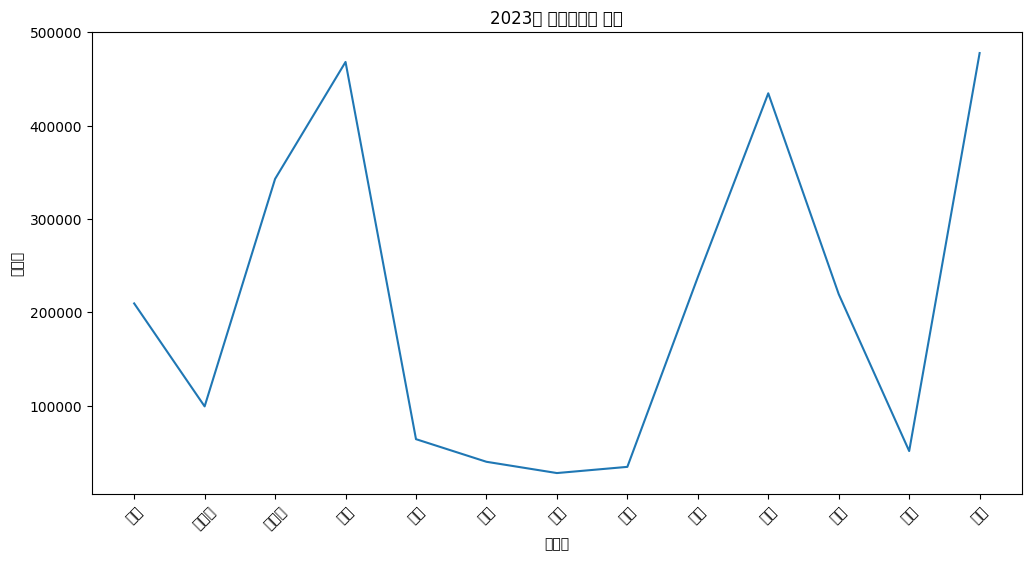

In [39]:
import matplotlib.pyplot as plt

# 발전소의 이름 리스트
x_labels = ["대청", "섬진강", "소양강", "안동", "용담", "의암", "임하", "주암", "청평", "춘천", "충주", "합천", "화천"]  # 발전소 이름을 원하는대로 나열

# 예측값 시각화
x_values = range(len(y_test_actual))  # x값 설정
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_test_actual)
plt.xticks(x_values, x_labels, rotation=45)  # x축 눈금과 레이블 설정, rotation은 레이블 텍스트 회전 각도
plt.xlabel("발전소")
plt.ylabel("발전량")
plt.title("2023년 수력발전량 예측")
plt.show()